<a href="https://colab.research.google.com/github/shoaibahmad0/Deep-learning-models/blob/main/cnn_model_predicting_10_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [7]:
class_labels = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck' ]

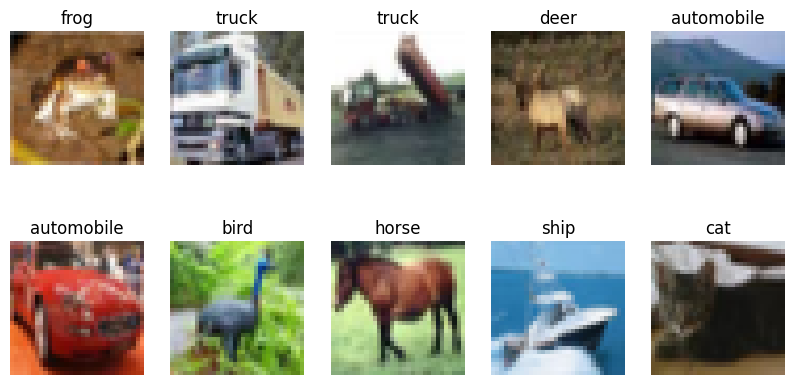

In [8]:
fig, axes = plt.subplots(2,5, figsize=(10,5))

for i, ax in enumerate(axes.flat):
    image, label =x_train[i], y_train[i]

    ax.imshow(image, cmap='gray')

    ax.set_title(f"{class_labels[label.item()]}")
    ax.axis('off')
plt.show()

In [9]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3487 - loss: 1.7525 - val_accuracy: 0.5565 - val_loss: 1.2285
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5920 - loss: 1.1548 - val_accuracy: 0.6200 - val_loss: 1.0705
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6570 - loss: 0.9766 - val_accuracy: 0.6355 - val_loss: 1.0407
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6865 - loss: 0.8918 - val_accuracy: 0.6721 - val_loss: 0.9258
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7111 - loss: 0.8193 - val_accuracy: 0.6798 - val_loss: 0.9136


In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6806 - loss: 0.9131
Test Loss: 0.9136
Test Accuracy: 67.98%


In [20]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


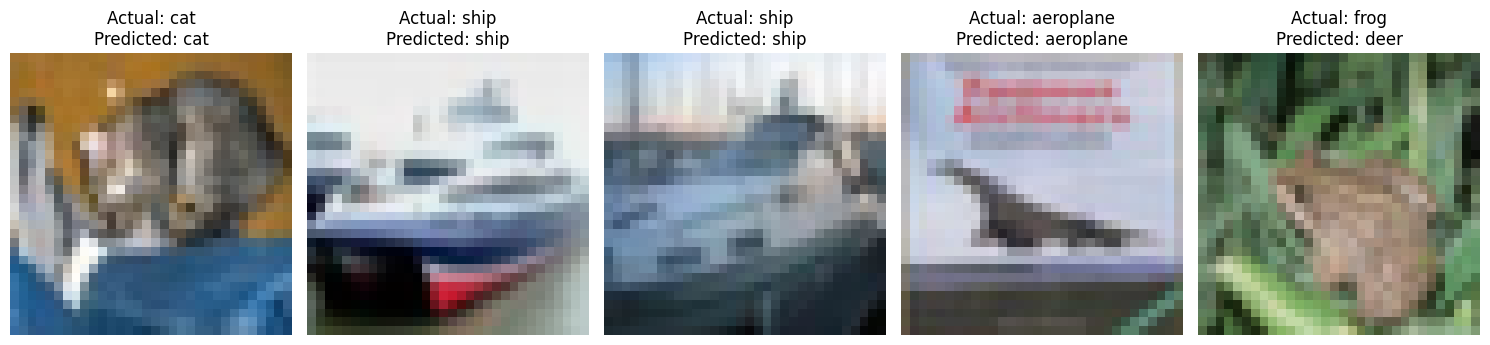

In [21]:
num_images_to_display = 5
num_columns = 4
num_rows = (num_images_to_display + num_columns - 1) // num_columns
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(x_test[i], cmap='gray')
        actual_label = class_labels[np.argmax(y_test[i])]
        predicted_label = class_labels[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()